In [21]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes # Gera bytes criptograficamente seguros, usado para criar a chave.

import time
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Geração da chave AES
aes_key = get_random_bytes(32)  # 32 bytes = 256 bits

# Salva a chave AES para uso posterior (criptografia simétrica)
with open("AES_keys/aes_key.pem", "wb") as key_file:
    key_file.write(aes_key)

* Essa chave será usada para criptografar e descriptografar os arquivos.
* AES-256 oferece segurança de 256 bits — considerada extremamente forte hoje.

In [23]:
# Tempo de excecução
tempos_execucao = []
execucoes = []

for rodagem in range(218, 300):
    inicio = time.perf_counter()
    print(f'Iniciando criptografia AES: arquivo {rodagem}')

    dicom_path = f'C:\\Users\\CarlosChinen\\OneDrive\\Main\\FEI\\TCC\\Criptografia\\criptografia\\DATASET_dicom_fourier_spectrum\\spectrum_slice_{rodagem}.png'
    # dicom_path = f'C:\\Users\\massa\\OneDrive\\Main\\FEI\\TCC\\Criptografia\\criptografia\\DATASET_dicom_fourier_spectrum\\spectrum_slice_{rodagem}.png'

    with open(dicom_path, "rb") as dicom_file: # Abre e lê os dados binários da imagem do espectro
        image_data = dicom_file.read()

    # Criptografia AES no modo EAX - Confidencialidade + Integraidade
    cipher_aes = AES.new(aes_key, AES.MODE_EAX) # Cria uma cifra AES no modo EAX
    ciphertext, tag = cipher_aes.encrypt_and_digest(image_data) # Retornos: ciphertext = dado criptografado; tag = código de autenticação gerado para integridade

    # Salva os componentes necessários para descriptografia:
    with open(f"AES_crypto_spectrum_metrics/AES_spectrum_criptografado_{rodagem}.enc", "wb") as out_file:
        out_file.write(cipher_aes.nonce) # (number used once) valor aleatório único que o AES-EAX precisa para descriptografar
        out_file.write(tag) # verificação de integridade/autenticidade
        out_file.write(ciphertext) # dados da imagem criptografada

    fim = time.perf_counter()
    tempo_execucao = fim - inicio
    tempos_execucao.append(tempo_execucao)
    execucoes.append(rodagem)

    print(f'Criptografia AES finalizada: arquivo {rodagem}')
    print(f"Tempo de execução: {tempo_execucao:.5f} segundos\n")

print(f'\nTempo médio de execução: {np.mean(tempos_execucao):.5f}')

Iniciando criptografia AES: arquivo 218
Criptografia AES finalizada: arquivo 218
Tempo de execução: 0.00195 segundos

Iniciando criptografia AES: arquivo 219
Criptografia AES finalizada: arquivo 219
Tempo de execução: 0.00318 segundos

Iniciando criptografia AES: arquivo 220
Criptografia AES finalizada: arquivo 220
Tempo de execução: 0.00275 segundos

Iniciando criptografia AES: arquivo 221
Criptografia AES finalizada: arquivo 221
Tempo de execução: 0.00218 segundos

Iniciando criptografia AES: arquivo 222
Criptografia AES finalizada: arquivo 222
Tempo de execução: 0.00197 segundos

Iniciando criptografia AES: arquivo 223
Criptografia AES finalizada: arquivo 223
Tempo de execução: 0.00184 segundos

Iniciando criptografia AES: arquivo 224
Criptografia AES finalizada: arquivo 224
Tempo de execução: 0.00196 segundos

Iniciando criptografia AES: arquivo 225
Criptografia AES finalizada: arquivo 225
Tempo de execução: 0.00219 segundos

Iniciando criptografia AES: arquivo 226
Criptografia AES

### Resumo
| Etapa                  | Ação                                                                 |
|------------------------|----------------------------------------------------------------------|
| Geração da chave       | `get_random_bytes(32)` cria uma chave AES-256                        |
| Carregamento da imagem | Lê a imagem do espectro como bytes                                               |
| Criptografia           | AES no modo EAX para criptografa com integridade            |
| Armazenamento          | Salva nonce, tag e ciphertext em arquivo                            |

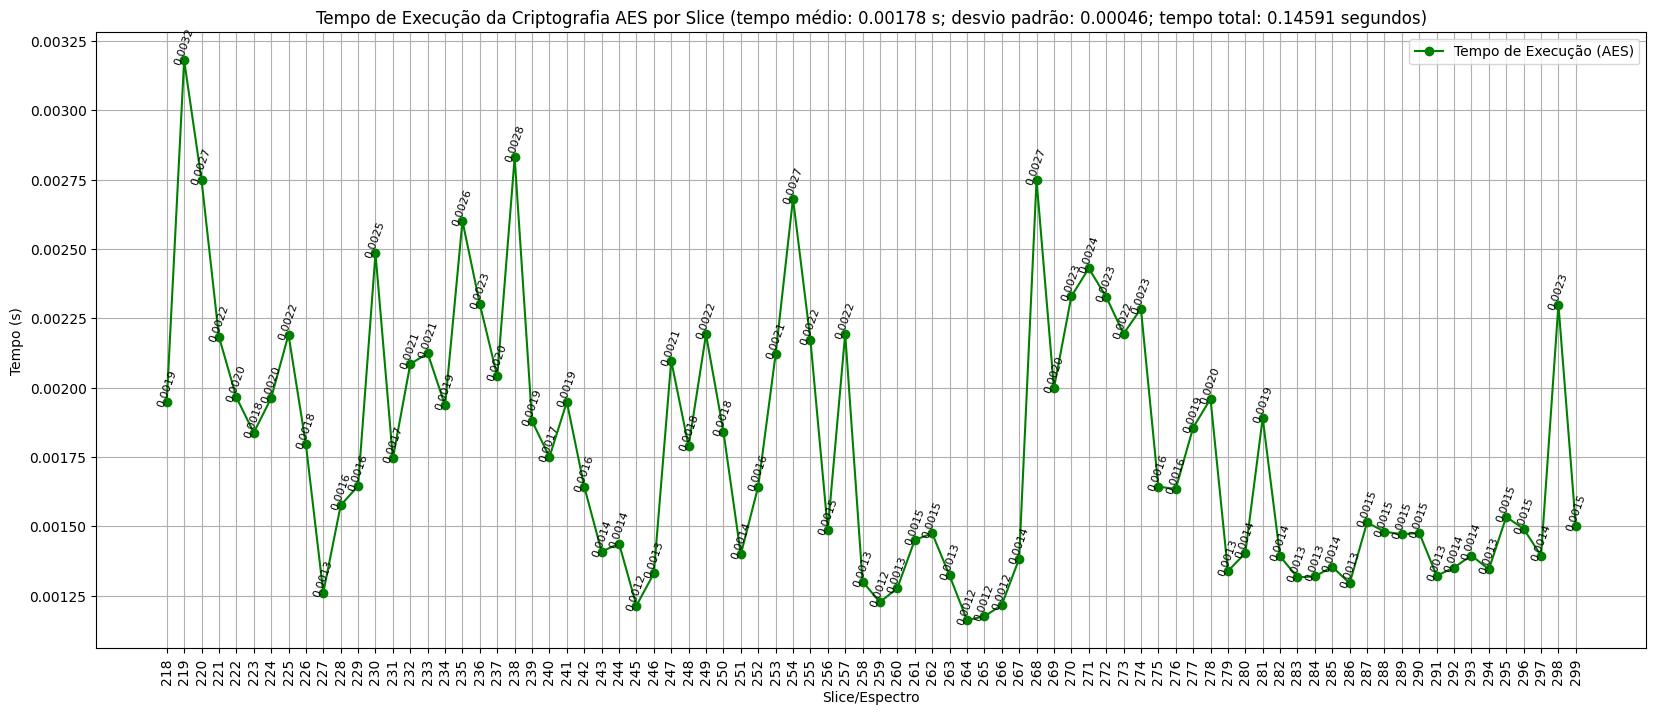

In [24]:
plt.figure(figsize=(20, 8))
plt.plot(execucoes, tempos_execucao, marker='o', linestyle='-', color='green', label='Tempo de Execução (AES)')

for x, y in zip(execucoes, tempos_execucao):
    plt.text(x, y + 0.00005, f'{y:.4f}', ha='center', va='center', fontsize=8, rotation=70)

plt.xticks(execucoes, rotation=90)
plt.xlabel('Slice/Espectro')
plt.ylabel('Tempo (s)')
plt.title(f'Tempo de Execução da Criptografia AES por Slice (tempo médio: {np.mean(tempos_execucao):.5f} s; desvio padrão: {np.std(tempos_execucao, ddof=0):.5f}; tempo total: {np.sum(tempos_execucao):.5f} segundos)')
plt.legend()
plt.grid(True)
plt.savefig('output_images/graph_tempo_execucao_aes_criptografia_espectro.png')
plt.show()
